<a href="https://colab.research.google.com/github/brayanricardo13/Analisis-Econometrico/blob/main/BENCHMARK_APT_FIB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap

In [ ]:
from google.colab import files
# Subir múltiples archivos
uploaded = files.upload()

In [38]:
IDCdb = pd.read_excel("/content/Actualización Unidad Histórica IDCdB al 12 de Julio 2023.xlsx", sheet_name="Ficha semanal")

In [39]:
FIB = pd.read_excel("/content/Comision FIB.xlsx", sheet_name="Portafolio FIB")

In [40]:
FIB = FIB[["datFechaAct", "ValorUnidad"]]
FIB.columns = ['Fecha', 'Valor de unidad']

In [41]:
FIB['Fecha'] = pd.to_datetime(FIB['Fecha'])

In [42]:
IDCdb = IDCdb.iloc[3:, [14, 17]]
IDCdb.columns = ['Fecha', 'Valor de unidad']

In [43]:
IDCdb['Fecha'] = pd.to_datetime(IDCdb['Fecha'])

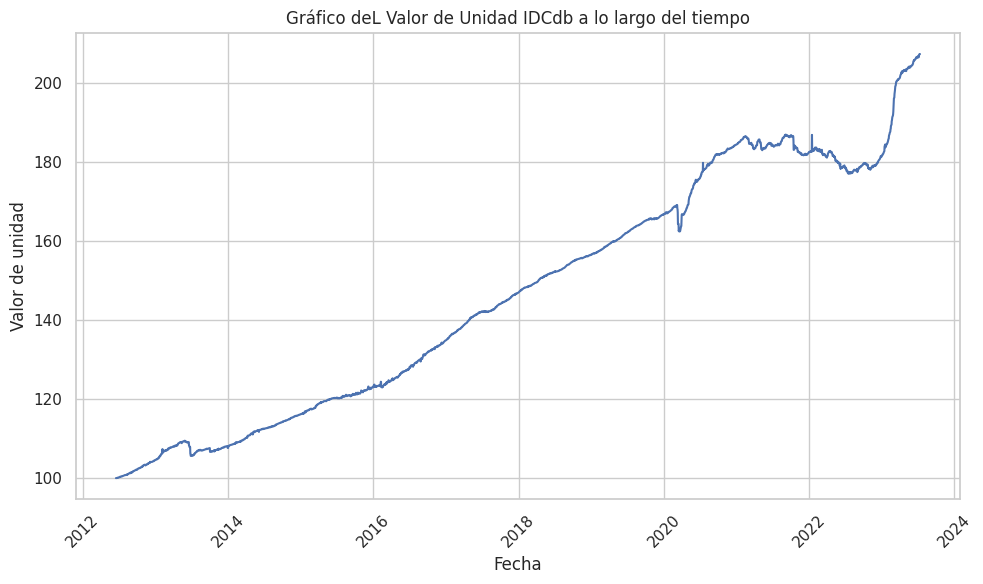

In [48]:
# Configurar el estilo de diseño con seaborn
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
plt.plot(IDCdb['Fecha'], IDCdb['Valor de unidad'])
plt.xlabel('Fecha')
plt.ylabel('Valor de unidad')
plt.title('Gráfico deL Valor de Unidad IDCdb a lo largo del tiempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

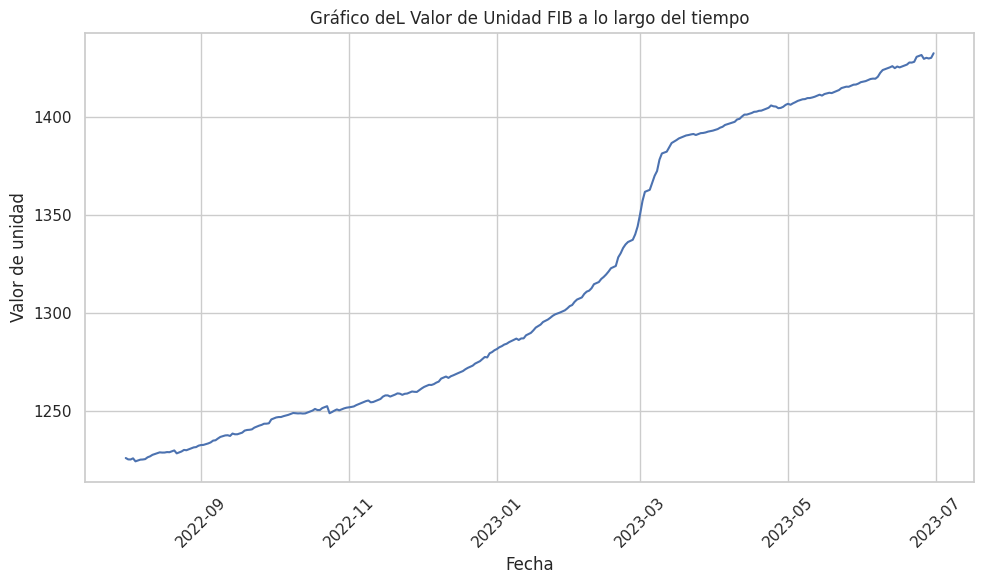

In [50]:
# Configurar el estilo de diseño con seaborn
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
plt.plot(FIB['Fecha'], FIB['Valor de unidad'])
plt.xlabel('Fecha')
plt.ylabel('Valor de unidad')
plt.title('Gráfico deL Valor de Unidad FIB a lo largo del tiempo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-58-4e7a2517d66c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IDCdb_filtered['Índice base 1000'] = IDCdb_filtered['Valor de unidad'] / IDCdb_filtered.iloc[0]['Valor de unidad'] * 1000


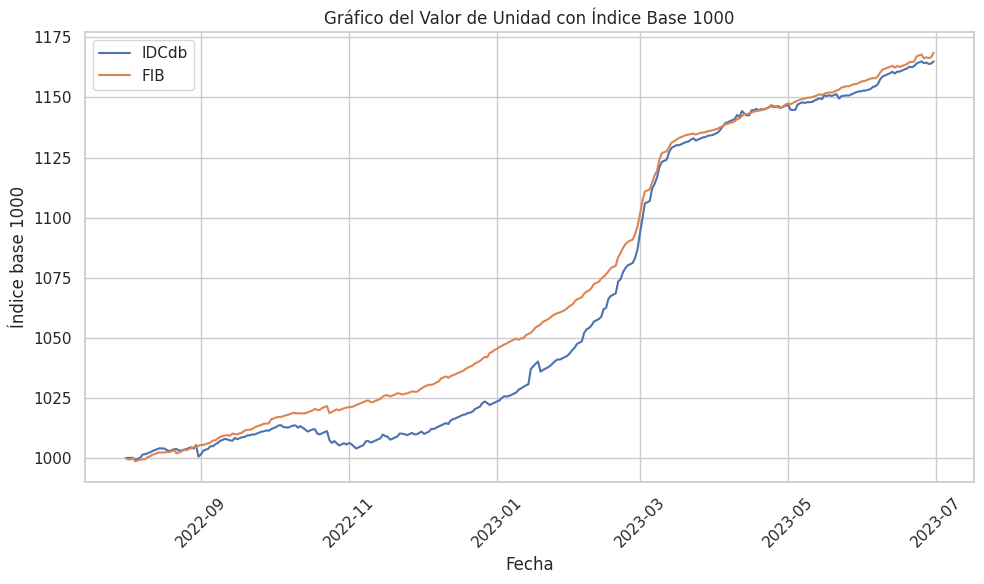

In [58]:
# Configurar el estilo de diseño con seaborn
sns.set(style="whitegrid")
# Suponiendo que tienes IDCdb y FIB como DataFrames con las columnas "Fecha" y "Valor de unidad"
# Encontrar la primera fecha común en ambos conjuntos de datos
fecha_minima = max(min(IDCdb['Fecha']), min(FIB['Fecha']))
fecha_maxima = min(max(IDCdb['Fecha']), max(FIB['Fecha']))
# Filtrar los datos desde la primera fecha común hasta la última fecha común
IDCdb_filtered = IDCdb[(IDCdb['Fecha'] >= fecha_minima) & (IDCdb['Fecha'] <= fecha_maxima)]
FIB_filtered = FIB[(FIB['Fecha'] >= fecha_minima) & (FIB['Fecha'] <= fecha_maxima)]
# Calcular el índice base 1000 para ambas series
IDCdb_filtered['Índice base 1000'] = IDCdb_filtered['Valor de unidad'] / IDCdb_filtered.iloc[0]['Valor de unidad'] * 1000
FIB_filtered['Índice base 1000'] = FIB_filtered['Valor de unidad'] / FIB_filtered.iloc[0]['Valor de unidad'] * 1000
# Trazar ambos gráficos en el mismo gráfico
plt.figure(figsize=(10, 6))
plt.plot(IDCdb_filtered['Fecha'], IDCdb_filtered['Índice base 1000'], label='IDCdb')
plt.plot(FIB_filtered['Fecha'], FIB_filtered['Índice base 1000'], label='FIB')
plt.xlabel('Fecha')
plt.ylabel('Índice base 1000')
plt.title('Gráfico del Valor de Unidad con Índice Base 1000')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-61-5767ac06d3c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IDCdb_filtered['Rendimiento diario'] = IDCdb_filtered['Índice base 1000'].pct_change()


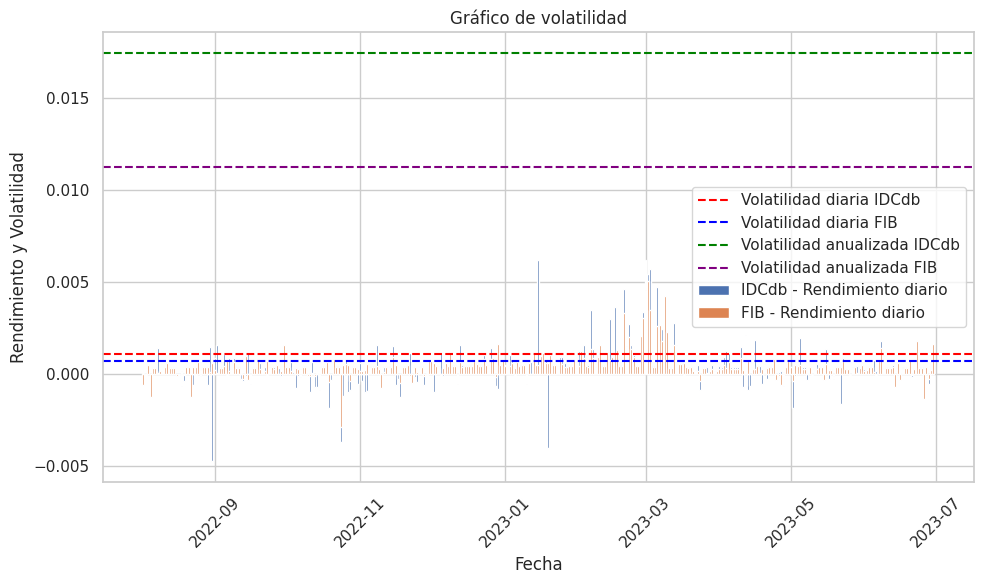

In [61]:
# Calcular el rendimiento diario para ambos índices o activos
IDCdb_filtered['Rendimiento diario'] = IDCdb_filtered['Índice base 1000'].pct_change()
FIB_filtered['Rendimiento diario'] = FIB_filtered['Índice base 1000'].pct_change()
# Calcular la volatilidad diaria (desviación estándar del rendimiento)
volatilidad_diaria_IDCdb = IDCdb_filtered['Rendimiento diario'].std()
volatilidad_diaria_FIB = FIB_filtered['Rendimiento diario'].std()
# Calcular la volatilidad anualizada
dias_por_anio = 252  # Se asume que hay 252 días de negociación en un año
volatilidad_anualizada_IDCdb = volatilidad_diaria_IDCdb * np.sqrt(dias_por_anio)
volatilidad_anualizada_FIB = volatilidad_diaria_FIB * np.sqrt(dias_por_anio)
# Trazar el gráfico de volatilidad
plt.figure(figsize=(10, 6))
plt.bar(IDCdb_filtered['Fecha'], IDCdb_filtered['Rendimiento diario'], label='IDCdb - Rendimiento diario')
plt.bar(FIB_filtered['Fecha'], FIB_filtered['Rendimiento diario'], label='FIB - Rendimiento diario')
plt.axhline(y=volatilidad_diaria_IDCdb, color='red', linestyle='dashed', label='Volatilidad diaria IDCdb')
plt.axhline(y=volatilidad_diaria_FIB, color='blue', linestyle='dashed', label='Volatilidad diaria FIB')
plt.axhline(y=volatilidad_anualizada_IDCdb, color='green', linestyle='dashed', label='Volatilidad anualizada IDCdb')
plt.axhline(y=volatilidad_anualizada_FIB, color='purple', linestyle='dashed', label='Volatilidad anualizada FIB')
plt.xlabel('Fecha')
plt.ylabel('Rendimiento y Volatilidad')
plt.title('Gráfico de volatilidad')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()